# Data Modelling
***

### Classification Problem Algorithm:
#### Decision Trees

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('diabetes_encoded.csv')

In [5]:
df.set_index('encounter_id', inplace=True)
y = df['readmitted']
X = df.drop('readmitted', axis=1)

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print('Original training dataset shape {}'.format(Counter(y_train)))
print('Original testing dataset shape {}'.format(Counter(y_test)))

Original training dataset shape Counter({0: 43912, 1: 37500})
Original testing dataset shape Counter({0: 10952, 1: 9402})


In [7]:
# Initialize the decision tree classifier with very shallow tree by setting the max_depth parameter to 1
baseline_model = DecisionTreeClassifier(max_depth=1, random_state=42)
# Train the model
baseline_model.fit(X_train, y_train)
# Predict on the test set
y_pred = baseline_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Baseline Model Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Baseline Model Accuracy: 0.6126
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.76      0.68     10952
           1       0.61      0.44      0.51      9402

    accuracy                           0.61     20354
   macro avg       0.61      0.60      0.60     20354
weighted avg       0.61      0.61      0.60     20354



In [8]:
# handle class imbalance
# Initialize SMOTE and baseline model
smote = SMOTE(random_state=42)
baseline_model_smote = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('classifier', baseline_model_smote)
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate Dummy Classifier
y_pred_base_smote = pipeline.predict(X_test)
base_accuracy_smote = accuracy_score(y_test, y_pred_base_smote)
print(f'Baseline Model Accuracy (shallowest tree) with SMOTE: {base_accuracy_smote}')

base_precision_smote = precision_score(y_test, y_pred_base_smote, average='binary')
base_recall_smote = recall_score(y_test, y_pred_base_smote, average='binary')
base_f1_smote = f1_score(y_test, y_pred_base_smote, average='binary')

print(f'Baseline Model Precision with SMOTE: {base_precision_smote}')
print(f'Baseline Model Recall with SMOTE: {base_recall_smote}')
print(f'Baseline Model F1 Score with SMOTE: {base_f1_smote}')

print(y.value_counts())

Baseline Model Accuracy (shallowest tree) with SMOTE: 0.6125577282106711
Baseline Model Precision with SMOTE: 0.6110460005859947
Baseline Model Recall with SMOTE: 0.44362901510316954
Baseline Model F1 Score with SMOTE: 0.5140497904855805
readmitted
0    54864
1    46902
Name: count, dtype: int64


In [9]:
# Initialize the decision tree classifier with default settings
dT_model = DecisionTreeClassifier(random_state=42)
# Train the model
dT_model.fit(X_train, y_train)
# Predict on the test set
y_pred_dT = dT_model.predict(X_test)
# Evaluate the model
accuracy_dT = accuracy_score(y_test, y_pred)
report_dT = classification_report(y_test, y_pred)

print(f'Decision Tree Model Accuracy: {accuracy_dT:.4f}')
print('Classification Report:')
print(report_dT)

Decision Tree Model Accuracy: 0.6126
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.76      0.68     10952
           1       0.61      0.44      0.51      9402

    accuracy                           0.61     20354
   macro avg       0.61      0.60      0.60     20354
weighted avg       0.61      0.61      0.60     20354



Scaling the data using a standard scaler to see if any improvement

In [11]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Train the model
dT_model_scaled = DecisionTreeClassifier(random_state=42)
dT_model_scaled.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_scaled = dT_model_scaled.predict(X_test_scaled)
dT_scaled_accuracy = accuracy_score(y_test, y_pred_scaled)
print(f'Decision Tree Accuracy: {accuracy_dT}')
print(f'Decision Tree Accuracy after scaling: {dT_scaled_accuracy}')

Decision Tree Accuracy: 0.6125577282106711
Decision Tree Accuracy after scaling: 0.570256460646556


In [12]:
# Cross-Validation
scores = cross_val_score(dT_model_scaled, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Accuracy after scaling: {scores.mean()}')

Cross-Validation Scores: [0.56052864 0.55677296 0.55328453 0.56429028 0.55618336]
Average Cross-Validation Accuracy after scaling: 0.5582119537302311


In [13]:
# Cross-Validation
scores = cross_val_score(dT_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Accuracy before scaling: {scores.mean()}')

Cross-Validation Scores: [0.56052864 0.55677296 0.55328453 0.56429028 0.55618336]
Average Cross-Validation Accuracy before scaling: 0.5582119537302311


Model Optimisation

Randomly sample a fraction of the dataset. This is particularly useful for faster model training and hyperparameter tuning.



In [16]:
# Sample a fraction (e.g., 10%) of the dataset
subset = df.sample(frac=0.05, random_state=42)  # 10% of the data

# Split the subset into features and target
X_subset = subset.drop('readmitted', axis=1)
y_subset = subset['readmitted']

In [17]:
# Split data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_subset, y_subset, train_size=0.8, random_state=42)
print('Sample training dataset shape {}'.format(Counter(y_train_sample)))
print('Sample testing dataset shape {}'.format(Counter(y_test_sample)))

Sample training dataset shape Counter({0: 2167, 1: 1903})
Sample testing dataset shape Counter({0: 552, 1: 466})


In [18]:
# Randomized Search for Hyperparameters
# Define the parameter grid for DecisionTreeClassifier
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
random_search = RandomizedSearchCV(
    estimator=dT_model, 
    param_distributions=param_distributions,
    n_iter=10, # Number of parameter settings to sample 
    cv=5, # Number of folds in cross-validation 
    scoring='accuracy', # Metric to optimize
    verbose=1, # Verbosity level
    random_state=42 # For reproducibility
)
# Fit RandomizedSearchCV
random_search.fit(X_train_sample, y_train_sample)
# Print best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
Best score: 0.5926289926289926


In [19]:
# Train the final model
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the final model
y_pred_final = best_model.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
class_report_final = classification_report(y_test, y_pred_final)

print(f'Optimised Accuracy: {accuracy_final}')
print('Optimised Confusion Matrix:')
print(conf_matrix_final)
print('Optimised Classification Report:')
print(class_report_final)

Optimised Accuracy: 0.6322098850348826
Optimised Confusion Matrix:
[[7616 3336]
 [4150 5252]]
Optimised Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67     10952
           1       0.61      0.56      0.58      9402

    accuracy                           0.63     20354
   macro avg       0.63      0.63      0.63     20354
weighted avg       0.63      0.63      0.63     20354



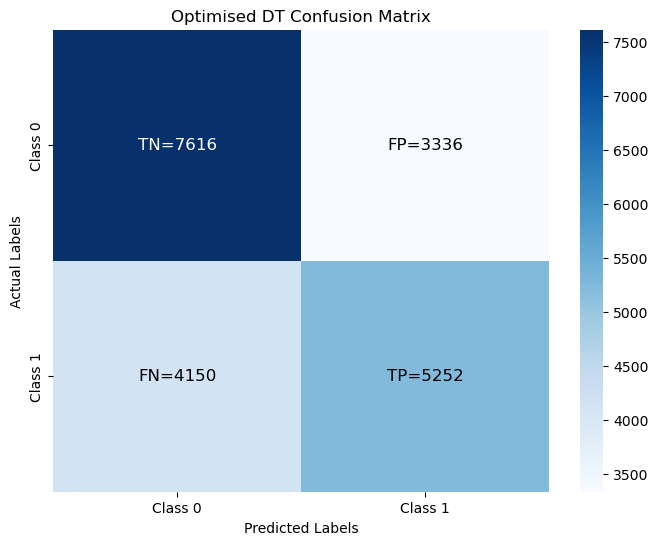

In [58]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_final, fmt='d', cmap='Blues', annot_kws={"size": 16},
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Optimised DT Confusion Matrix')

# Add text annotations for TP, TN, FP, FN
plt.text(0.5, 0.5, 'TN={}'.format(conf_matrix_final[0, 0]), ha='center', va='center', color='white', fontsize=12)
plt.text(1.5, 0.5, 'FP={}'.format(conf_matrix_final[0, 1]), ha='center', va='center', color='black', fontsize=12)
plt.text(0.5, 1.5, 'FN={}'.format(conf_matrix_final[1, 0]), ha='center', va='center', color='black', fontsize=12)
plt.text(1.5, 1.5, 'TP={}'.format(conf_matrix_final[1, 1]), ha='center', va='center', color='black', fontsize=12)

plt.savefig('DTafterHT.png', dpi=300)

plt.show()

In [22]:
# compare with original model
print(f'Decision Tree Accuracy: {accuracy_dT}')
dT_cm = confusion_matrix(y_test, y_pred_dT)
print('Original Confusion Matrix:')
print(dT_cm)
class_report = classification_report(y_test, y_pred_dT)
print('Original Classification Report:')
print(class_report)

Decision Tree Accuracy: 0.6125577282106711
Original Confusion Matrix:
[[6538 4414]
 [4332 5070]]
Original Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60     10952
           1       0.53      0.54      0.54      9402

    accuracy                           0.57     20354
   macro avg       0.57      0.57      0.57     20354
weighted avg       0.57      0.57      0.57     20354



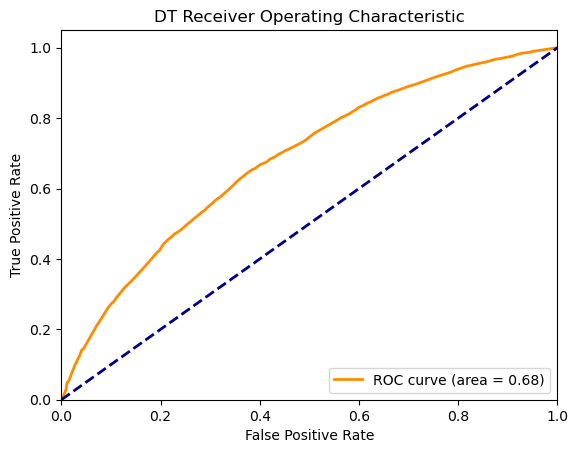

In [43]:
# Compute ROC curve and AUC for best model
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC.png', dpi=300)
plt.show()